<a href="https://www.kaggle.com/code/michaelsouuza/notebook-netflix-data-project?scriptVersionId=233215809" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a href="https://www.kaggle.com/code/michaelsouuza/notebook-netflix-data-project?scriptVersionId=233310404" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a href="https://www.kaggle.com/code/michaelsouuza/notebook-netflix-data-project?scriptVersionId=233215809" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Loading Netflix dataset...
Data loaded! 8807 rows, 12 columns


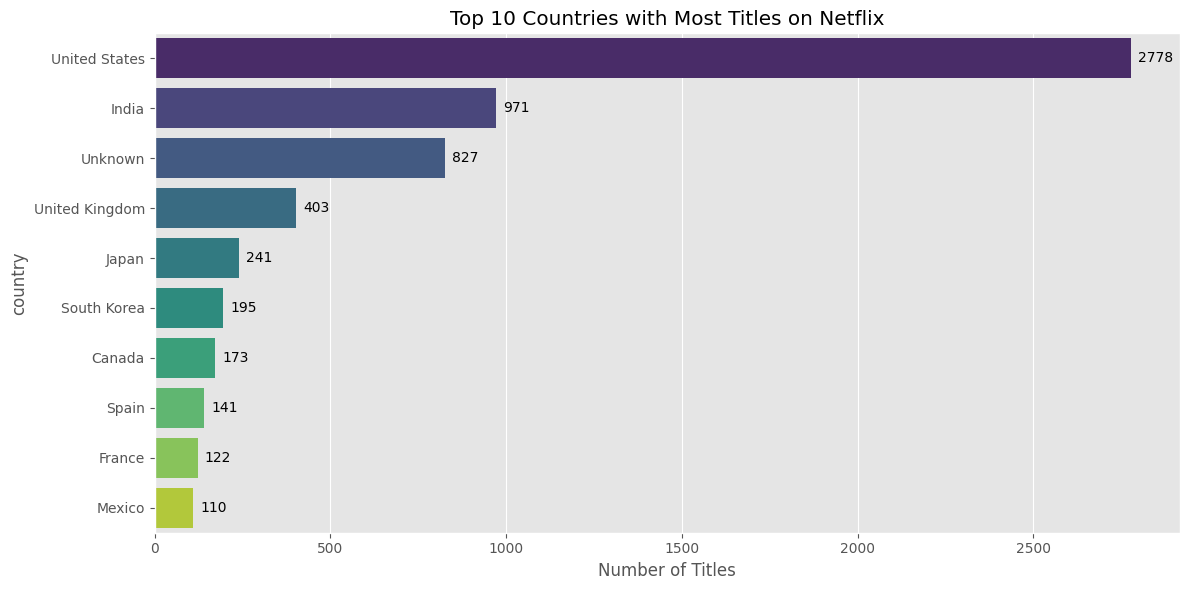

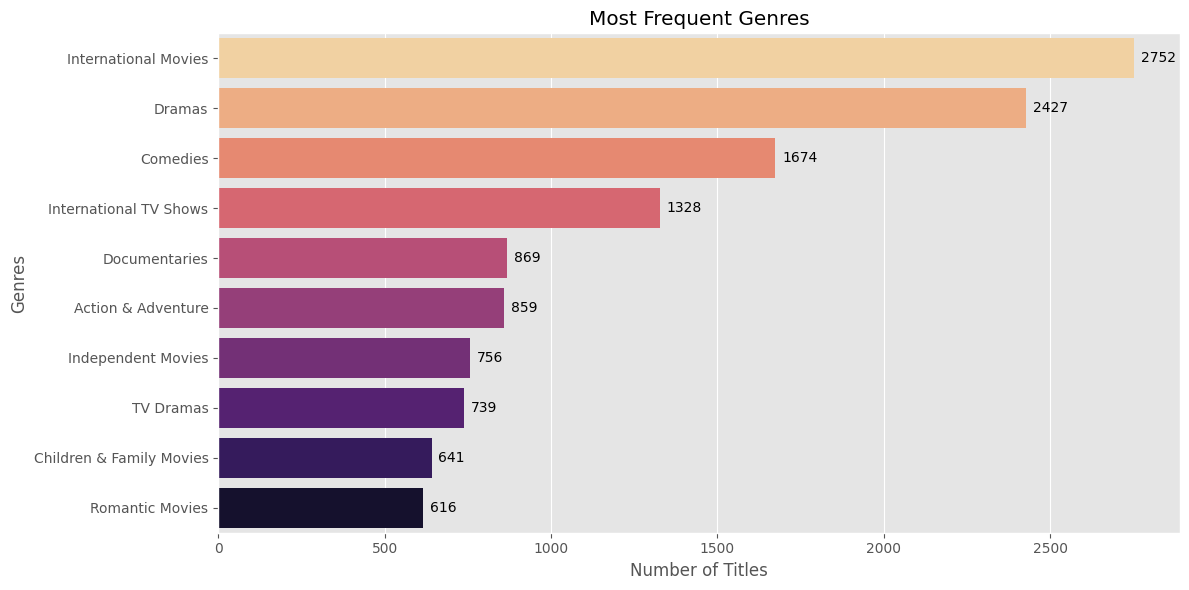

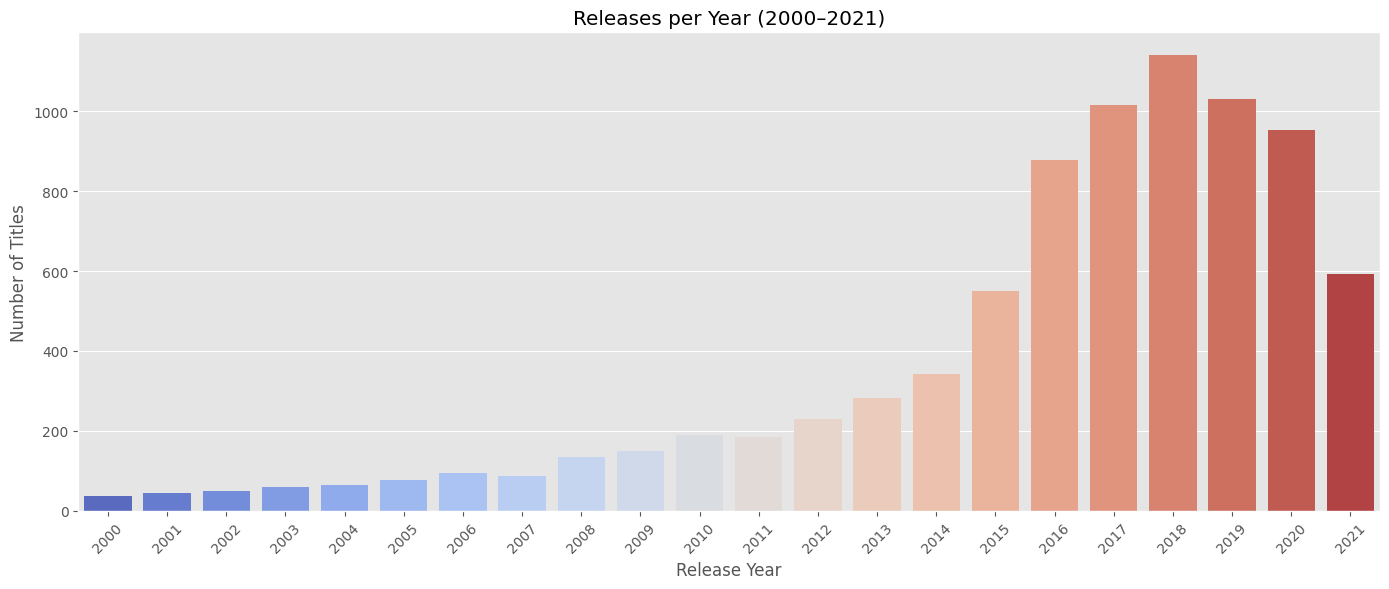

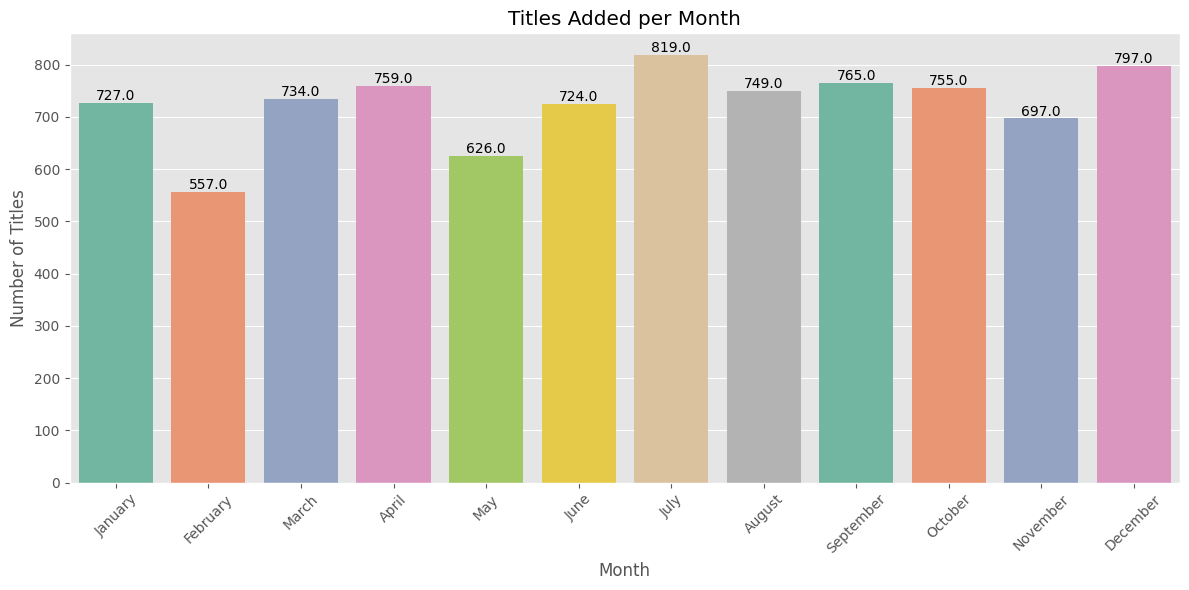

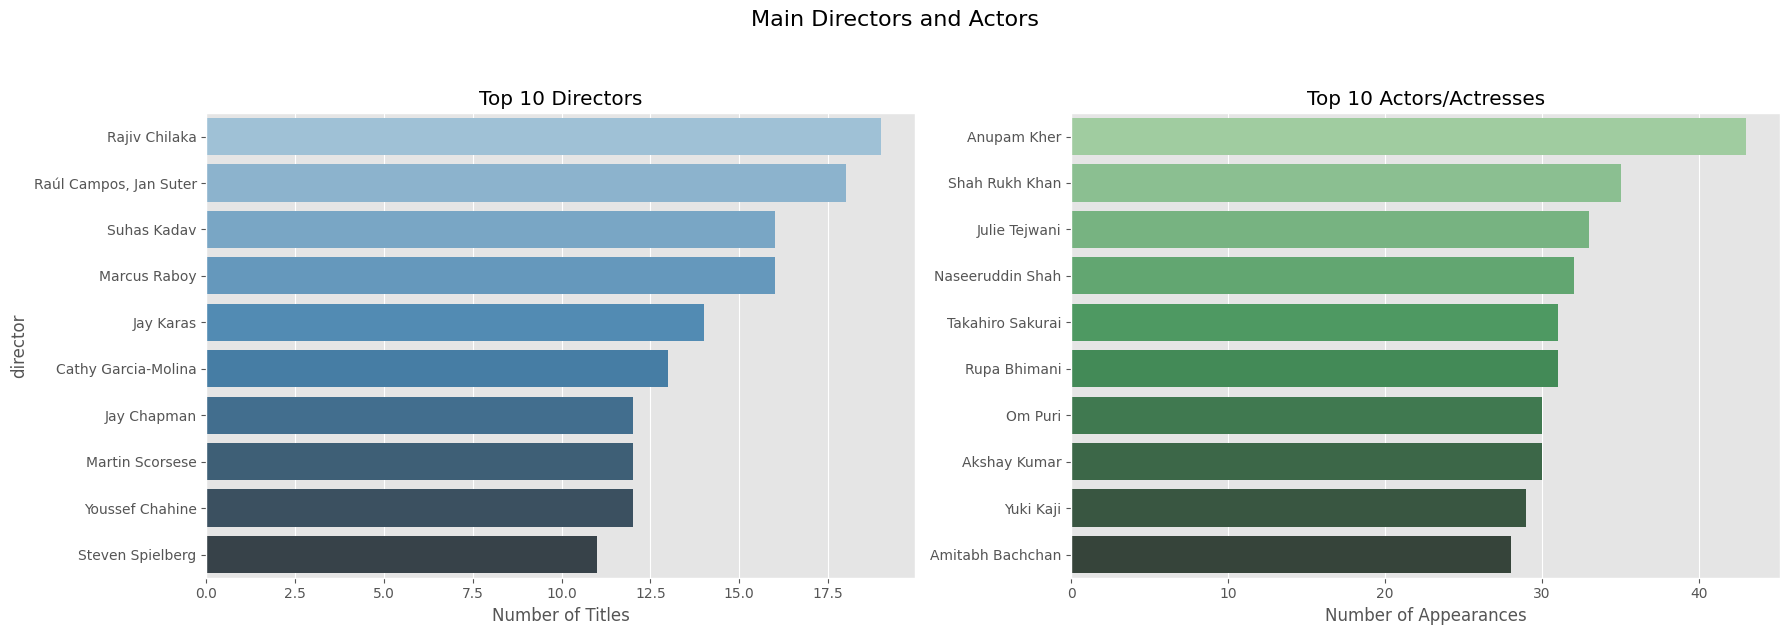


Analysis Complete! Here are some interesting insights:
- The US still dominates content production — no big surprise there.
- Drama and international content are the most common genres.
- The year with the most releases was: 2018
- More titles tend to be added during holiday or vacation months (like summer and year-end).
- Several directors and actors appear very frequently — definitely worth keeping an eye on them!


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import calendar

# Visual style — Personal Taste-no technique involved
plt.style.use('ggplot')
sns.set_palette("husl")
plt.rcParams['figure.facecolor'] = 'white'

# Loading Data
print("Loading Netflix dataset...")
netflix_df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
print(f"Data loaded! {netflix_df.shape[0]} rows, {netflix_df.shape[1]} columns")

# Data Cleaning
netflix_df['director'] = netflix_df['director'].fillna('Unknown')
netflix_df['cast'] = netflix_df['cast'].fillna('Unspecified')
netflix_df['country'] = netflix_df['country'].fillna('Unknown')
netflix_df['rating'] = netflix_df['rating'].fillna(netflix_df['rating'].mode()[0])
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')
netflix_df = netflix_df.dropna(subset=['date_added'])

# Country Analysis
plt.figure(figsize=(12,6))
top_countries = netflix_df['country'].value_counts().head(10)
ax = sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries with Most Titles on Netflix')
plt.xlabel('Number of Titles')
for i, v in enumerate(top_countries.values):
    ax.text(v + 20, i, str(v), color='black', va='center')
plt.tight_layout()
plt.show()

# Genre Analysis
all_genres = netflix_df['listed_in'].str.split(', ').explode()
top_genres = all_genres.value_counts().head(10)
plt.figure(figsize=(12,6))
ax = sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma_r')
plt.title('Most Frequent Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genres')
for i, v in enumerate(top_genres.values):
    ax.text(v + 20, i, str(v), color='black', va='center')
plt.tight_layout()
plt.show()

# Releases Over the Years
recent_years = netflix_df[netflix_df['release_year'] >= 2000]
plt.figure(figsize=(14,6))
ax = sns.countplot(x='release_year', data=recent_years,
                   order=sorted(recent_years['release_year'].unique()),
                   palette='coolwarm')
plt.title('Releases per Year (2000–2021)')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
peak_year = recent_years['release_year'].value_counts().idxmax()
for p in ax.patches:
    if p.get_x() + p.get_width()/2 == list(sorted(recent_years['release_year'].unique())).index(peak_year) + 0.5:
        p.set_edgecolor('red')
        p.set_linewidth(2)
plt.tight_layout()
plt.show()

# Monthly Additions
netflix_df['month_added'] = netflix_df['date_added'].dt.month_name()
month_order = list(calendar.month_name)[1:]
plt.figure(figsize=(12,6))
ax = sns.countplot(x='month_added', data=netflix_df, order=month_order, palette='Set2')
plt.title('Titles Added per Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f"{p.get_height()}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
plt.show()

# Top Directors and Actors
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Main Directors and Actors', fontsize=16, y=1.05)

# Directors
directors = netflix_df[netflix_df['director'] != 'Unknown']['director'].value_counts().head(10)
sns.barplot(x=directors.values, y=directors.index, ax=ax1, palette='Blues_d')
ax1.set_title('Top 10 Directors')
ax1.set_xlabel('Number of Titles')

# Actors
actors = [actor for sublist in netflix_df[netflix_df['cast'] != 'Unspecified']['cast'].str.split(', ') for actor in sublist]
top_actors = pd.Series(Counter(actors)).sort_values(ascending=False).head(10)
sns.barplot(x=top_actors.values, y=top_actors.index, ax=ax2, palette='Greens_d')
ax2.set_title('Top 10 Actors/Actresses')
ax2.set_xlabel('Number of Appearances')

plt.tight_layout()
plt.show()

# Final Insights
print("\nAnalysis Complete! Here are some interesting insights:")
print("- The US still dominates content production — no big surprise there.")
print("- Drama and international content are the most common genres.")
print(f"- The year with the most releases was: {peak_year}")
print("- More titles tend to be added during holiday or vacation months (like summer and year-end).")
print("- Several directors and actors appear very frequently — definitely worth keeping an eye on them!")


Technical Analysis of Netflix Data

The goal of this analysis is to explore the dataset of Netflix titles. Using data visualization techniques and data cleaning, we aim to identify patterns and insights regarding the distribution of content over the years, by countries, genres, and the key people behind the content creation. To achieve this, we used Pandas, Matplotlib, Seaborn, and other tools to perform exploratory data analysis.

1-Data Loading and Cleaning
The first step was loading the data using the pd.read_csv() function, which allowed us to import the Netflix titles dataset. The code was structured to ensure that, when loading the data, a preliminary check of the dataset's dimensions was performed, giving insight into the number of rows and columns.

By printing the dataset dimensions, the code confirms that the dataset was loaded successfully and is ready for analysis.

In the cleaning stage, the following treatments were performed:

Null Values:

For columns such as director, cast, country, and rating, missing values were filled with default or more appropriate values:
Directors and Actors: Replaced with 'Unknown' and 'Unspecified' respectively, as these columns may have missing entries.
Countries: Missing values in country were filled with 'Unknown' to maintain consistency in the analysis.
Ratings: For the rating column, missing values were filled with the most frequent value, using the mode of the data.
Date Handling: The date_added column was converted to the datetime type using pd.to_datetime(), with error handling set to 'coerce', ensuring that invalid entries were appropriately managed.

This ensures the date_added column is correctly processed, and any invalid entries are dropped for accurate time-based analysis.

#2-Country Analysis: Distribution of Content by Location

The analysis of content distribution by country was performed using the country column, which contains the countries of origin for each title. The resulting graph shows the top ten countries with the most titles available on the platform.

Using sns.barplot, a bar chart was generated to display the ten countries with the highest number of titles. The color palette "viridis" was chosen for its effectiveness in conveying quantitative data in an intuitive manner.

#Insights:

The United States stands out as the country with the highest number of titles, reflecting the dominance of locally produced content.
This visualization allows us to quickly see which countries contribute the most content to the platform, which is crucial for understanding the diversity of Netflix’s catelogue.
#3-Genre Analysis: Most Common Content Types

The listed_in column contains the genres of each title, with multiple genres separated by commas. To perform the genre analysis, the column was "exploded," splitting the multiple genres into separate rows. The resulting graph shows the top ten most frequent genres.

#Insights:

Drama and International Content are the most common genres, which are clearly dominant in Netflix's catalog.
This analysis is useful for understanding the preferences of Netflix's audience and the types of content most readily available on the platform.
#4-Evolution Over the Years: Releases from 2000 Onwards

The temporal analysis of releases focused on the period from 2000 to the present. Using the release_year column, a count plot by year was created, illustrating how the number of released titles has evolved over time.

The number of titles released saw a significant increase after 2010, reflecting Netflix's global expansion and its strategy of increasing original content.

#Insights:

Peak of Releases: The year with the highest number of releases was highlighted with red borders on the bars of the graph.
The number of titles released saw a significant increase after 2010, reflecting Netflix's global expansion and its strategy of increasing original content.
#5-Monthly Additions Analysis: When Is Content Most Added?

The analysis of monthly additions was performed using the date_added column, extracting the month name and creating a graph to visualize which periods of the year see the most frequent content additions.

#Insights:

Holiday and Vacation Periods: The months of November and December (end of the year) stand out with a large number of titles added, likely due to end-of-year campaigns and increased usage during holidays.
This graph helps understand Netflix's content update behavior and its marketing strategy during certain months.
#6-Key People Behind Netflix Content: Directors and Actors

The final analysis involved examining the key people behind Netflix's titles, focusing on directors and actors. For this, the director and cast columns were used to count the frequency of the top professionals involved.

The analysis was conducted in two parts:

Directors: The count of the most frequent directors was plotted using sns.barplot. Directors who are frequently involved in Netflix content may indicate popular or in-demand creators.
Actors: Similarly, the count of the most frequent actors was analyzed. The actors were extracted by splitting the cast field into individual names, and the top actors were visualized.
Insights:
Some directors and actors appear with a high frequency across multiple titles, highlighting their importance within Netflix's production. For example, directors who frequently appear may have established collaborations with Netflix for their unique styles or audience draw.
Recognizing frequently appearing actors is useful for understanding the kinds of personalities Netflix audiences are drawn to.
Conclusion
This analysis provides several insights into the Netflix dataset:

The United States dominates the production and distribution of Netflix titles.
Drama and International Content are the most common genres, which align with global audience preferences.
2010 and beyond has seen a significant rise in content production, particularly in original Netflix series and movies.
Content is added more frequently during certain months, such as the holiday season, which aligns with Netflix's marketing strategy.
Popular directors and actors are crucial to Netflix's strategy, with frequent contributors appearing across multiple titles.
This analysis allows us to gain a deeper understanding of how Netflix's catalog has evolved and how content distribution and consumption are affected by various factors, from genre preferences to seasonal patterns.